In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import interpolate
import scipy
from scipy import ndimage

In [55]:
ASCIIFILE = 'GPT_misalignment/trans_aligned.txt'
MConHBAR  =  2.59e12
maxsig = 1  # determine how many standard deviations are we going to plot

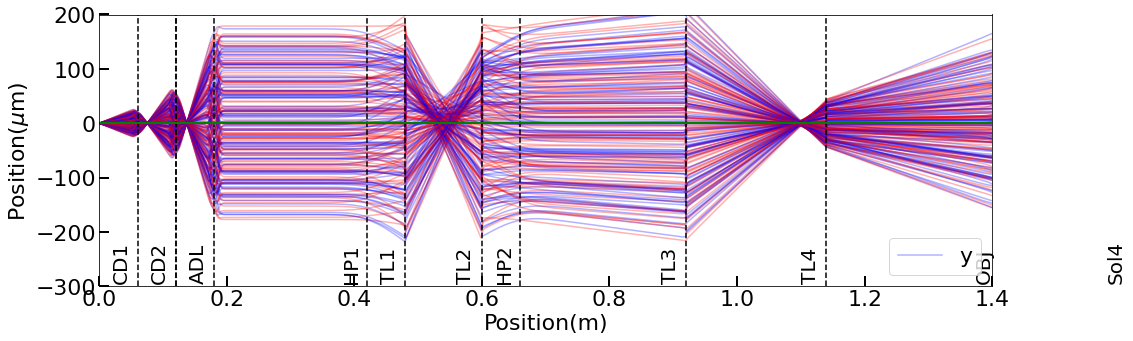

In [58]:
# Read the first particle:
screen =  np.loadtxt(ASCIIFILE, skiprows=2, max_rows = 8000)
x  = screen[:,0]
y  = screen[:,1]
z  = screen[:,2]
xmin_row = 2
xmax_row = 2
ymin_row = 2
ymax_row = 2

# fig = plt.figure(figsize=[16,5])
fig, ax = plt.subplots(1, figsize = [16,5])
# plt.plot(z-z[0],x*1e6,c = 'blue', label='x', alpha = 0.3)
plt.plot(z-z[0],y*1e6,c = 'blue', label='y', alpha = 0.3)
x_min = np.amin(x)
# y_min = np.amin(y)
x_max = np.amax(x)
# y_max = np.amax(y)

# set up a row index and read the rest
row_index = 8005
while row_index < 800000:
    screen = np.loadtxt(ASCIIFILE, skiprows = row_index, max_rows = 8000)
    x  = screen[:,0]
    y  = screen[:,1]
    z  = screen[:,2]
#     if np.amax(x[:6717]) > 1e-4 or np.amin(x[:6717]) < -1e-4 or np.amax(y[:6717]) > 1e-4 or np.amin(y[:6717]) < -1e-4:
#         row_index += 8003
#         continue
    plt.plot(z-z[0],x*1e6, c='blue', alpha = 0.3)
    plt.plot(z-z[0],y*1e6, c='red', alpha = 0.3)
    
    if np.amin(x) < x_min:
        x_min = np.amin(x)
        x_min_row = row_index
#         print('xmin' + str(x_min) + ',' + str(row_index))
        
    if np.amax(x) > x_max:
        x_max = np.amax(x)
        x_max_row = row_index
#         print('xmax' + str(x_max) + ',' + str(row_index))
        
    if np.amin(y) < y_min:
        y_min = np.amin(y)
        y_min_row = row_index
#         print('ymin' + str(y_min) + ',' + str(row_index))
        
    if np.amax(y) > y_max:
        y_max = np.amax(y)
        y_max_row = row_index
#         print('ymax' + str(y_max) + ',' + str(row_index))

    row_index = row_index + 8003


plt.ylim([min(x_min,y_min)*1.6e6, max(x_max, y_max)*1.2e6])
plt.ylabel('Position($\mu$m)', fontsize = 22)
plt.xlabel('Position(m)', fontsize = 22)
plt.tick_params(which='major',direction = 'in', length = 10, width = 2)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22)
plot_min = y_min

plot_min = -0.0002
# Mark all the components with vertical lines
plt.axvline(x=-36e-2-z[0], color='black', linestyle='dashed') # sol1
ax.text(-36e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'CD1', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x=-30e-2-z[0], color='black', linestyle='dashed') # sol2
ax.text(-30e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'CD2', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x=-24e-2-z[0], color='black', linestyle='dashed') # solt
ax.text(-24e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'ADL', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.99-z[0], color='black', linestyle='dashed') # sol3
ax.text(0.99+0.00361-z[0]-0.04, plot_min * 1.6e6 + 25, 'OBJ', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x=-30e-2-z[0], color='black', linestyle='dashed') # sol0, same position as sol2?

# sol 4 is not being used
plt.axvline(x= 120e-2-z[0], color='black', linestyle='dashed') # sol4
ax.text(120e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'Sol4', rotation=90, va='bottom', fontsize = 20)

# Four transfer lenses
plt.axvline(x= 0.06-z[0], color='black', linestyle='dashed') # csol1
ax.text(0.06-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL1', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.18-z[0], color='black', linestyle='dashed') # csol2
ax.text(0.18-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL2', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.5-z[0], color='black', linestyle='dashed') # csol3
ax.text(0.5-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL3', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.72-z[0], color='black', linestyle='dashed') # csol4
ax.text(0.72-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL4', rotation=90, va='bottom', fontsize = 20)

# Two hexapole components
plt.axvline(x= 0-z[0], color='black', linestyle='dashed') # hex1
ax.text(0.0-z[0]-0.04, plot_min * 1.6e6 + 25, 'HP1', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.24-z[0], color='black', linestyle='dashed') # hex2
ax.text(0.24-z[0]-0.04, plot_min * 1.6e6 + 25, 'HP2', rotation=90, va='bottom', fontsize = 20)

plt.ylim([-300,200])
plt.xlim([0,1.4])
# plt.ylim([-100,100])
# plt.xlim([0.0-z[0]-0.05, 0.0-z[0]+0.05])
plt.axhline(y=0, c='green', linewidth = 2)

In [35]:
plot_min

-0.0002

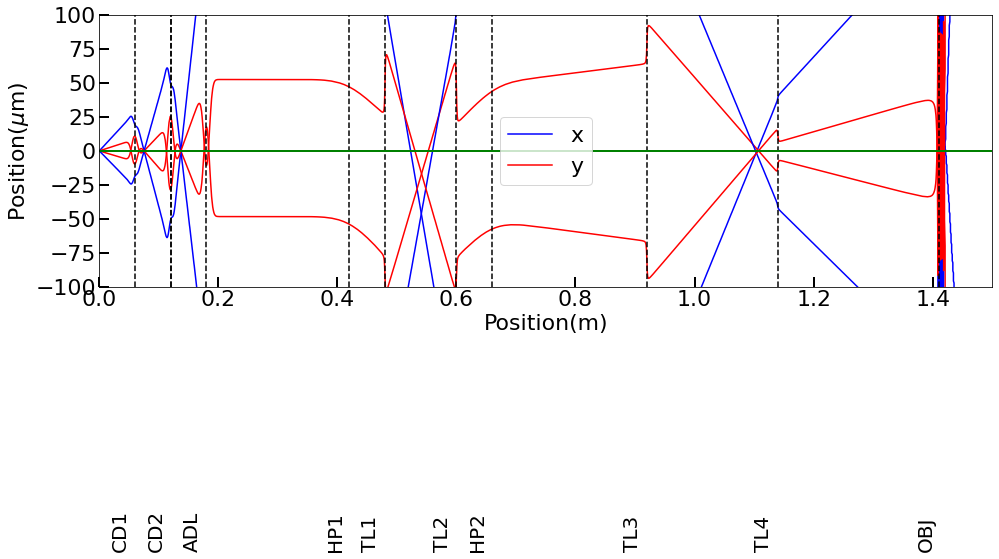

In [36]:
fig, ax = plt.subplots(1, figsize = [16,5])

# Read the first particle:
# screen =  np.loadtxt(ASCIIFILE, skiprows=x_min_row, max_rows = 8000)
# x  = screen[:,0]
# y  = screen[:,1]
# z  = screen[:,2]
# plt.plot(z-z[0],x*1e6,c = 'B', label='x')
# plt.plot(z-z[0],y*1e6,c = 'R', label='y')

# screen =  np.loadtxt(ASCIIFILE, skiprows=x_max_row, max_rows = 8000)
# x  = screen[:,0]
# y  = screen[:,1]
# z  = screen[:,2]
# plt.plot(z-z[0],x*1e6,c = 'B')
# plt.plot(z-z[0],y*1e6,c = 'R')

screen =  np.loadtxt(ASCIIFILE, skiprows=y_min_row, max_rows = 8000)
x  = screen[:,0]
y  = screen[:,1]
z  = screen[:,2]
plt.plot(z-z[0],x*1e6,c = 'blue', label='x')
plt.plot(z-z[0],y*1e6,c = 'red', label='y')

screen =  np.loadtxt(ASCIIFILE, skiprows=y_max_row, max_rows = 8000)
x  = screen[:,0]
y  = screen[:,1]
z  = screen[:,2]
plt.plot(z-z[0],x*1e6,c = 'blue')
plt.plot(z-z[0],y*1e6,c = 'red')

plt.ylim([min(x_min,y_min)*1.6e6, max(x_max, y_max)*1.2e6])
plt.ylabel('Position($\mu$m)', fontsize = 22)
plt.xlabel('Position(m)', fontsize = 22)
plt.tick_params(which='major',direction = 'in', length = 10, width = 2)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22)

plot_min = -0.0002
# Mark all the components with vertical lines
plt.axvline(x=-36e-2-z[0], color='black', linestyle='dashed') # sol1
ax.text(-36e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'CD1', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x=-30e-2-z[0], color='black', linestyle='dashed') # sol2
ax.text(-30e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'CD2', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x=-24e-2-z[0], color='black', linestyle='dashed') # solt
ax.text(-24e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'ADL', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.99-z[0], color='black', linestyle='dashed') # sol3
ax.text(0.99+0.00361-z[0]-0.04, plot_min * 1.6e6 + 25, 'OBJ', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x=-30e-2-z[0], color='black', linestyle='dashed') # sol0, same position as sol2?

# sol 4 is not being used
# plt.axvline(x= 120e-2-z[0], color='black', linestyle='dashed') # sol4
# ax.text(120e-2-z[0]-0.04, plot_min * 1.6e6 + 25, 'Sol4', rotation=90, va='bottom', fontsize = 20)

# Four transfer lenses
plt.axvline(x= 0.06-z[0], color='black', linestyle='dashed') # csol1
ax.text(0.06-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL1', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.18-z[0], color='black', linestyle='dashed') # csol2
ax.text(0.18-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL2', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.5-z[0], color='black', linestyle='dashed') # csol3
ax.text(0.5-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL3', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.72-z[0], color='black', linestyle='dashed') # csol4
ax.text(0.72-z[0]-0.04, plot_min * 1.6e6 + 25, 'TL4', rotation=90, va='bottom', fontsize = 20)

# Two hexapole components
plt.axvline(x= 0-z[0], color='black', linestyle='dashed') # hex1
ax.text(0.0-z[0]-0.04, plot_min * 1.6e6 + 25, 'HP1', rotation=90, va='bottom', fontsize = 20)

plt.axvline(x= 0.24-z[0], color='black', linestyle='dashed') # hex2
ax.text(0.24-z[0]-0.04, plot_min * 1.6e6 + 25, 'HP2', rotation=90, va='bottom', fontsize = 20)

plt.ylim([-100,100])
plt.xlim([0,1.5])
plt.axhline(y=0, c='green', linewidth = 2)

(-0.001, 0.001)

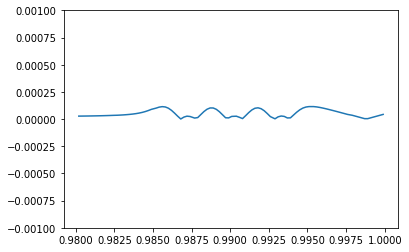

In [67]:
screen =  np.loadtxt(ASCIIFILE, skiprows=x_min_row, max_rows = 8000)
x1  = screen[:,0]
z  = screen[:,2]

screen =  np.loadtxt(ASCIIFILE, skiprows=x_max_row, max_rows = 8000)
x2  = screen[:,0]

diff = x1-x2
index = np.where((z>0.98) & (z<1.0))

plt.plot(z[index], diff[index])
plt.ylim([-0.001,0.001])

In [75]:
zero_idx = np.where((np.abs(diff)<1e-5) & (z>0.98) & (z<1.0) )
print(z[zero_idx])

[0.9868 0.9877 0.9908 0.9929 0.9987 0.9989]


In [83]:
index = np.where(z==0.9868)
print(index[0])
print(diff[index[0][0]-3:index[0][0]+3])
print(z[index[0][0]-3:index[0][0]+3])

[6749]
[8.0280e-05 5.4550e-05 2.6580e-05 9.0460e-07 1.8041e-05 2.6830e-05]
[0.9862 0.9864 0.9866 0.9868 0.987  0.9872]
